In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"
import sys
import torch
import matplotlib.pyplot as plt
import argparse
from diffusers import StableDiffusionPipeline, DDIMScheduler
from ovam.stable_diffusion import StableDiffusionHooker
from ovam.utils import set_seed
from torch.nn import DataParallel
import accelerate
import numpy as np
from matplotlib import gridspec
import numpy as np
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt
from PIL import Image
import random
from collections import defaultdict

In [ ]:
# model_id = "runwayml/stable-diffusion-v1-5"
model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id,requires_safety_checker=False,safety_checker=None).to('cuda')

In [33]:
import pickle

with open("/channels/red_objects_channels.pkl", "rb") as f:
    channels = pickle.load(f)

In [41]:
org_imgs = []
for i in range(10):
    set_seed(i)
    out = pipe("An apple.")[0]
    image = out.images[0]
    org_imgs.append(image)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [47]:
abl_imgs = []
for i in range(10):
    set_seed(i)
    out = pipe("An apple.",ablate_channels=channels)[0]
    image = out.images[0]
    abl_imgs.append(image)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

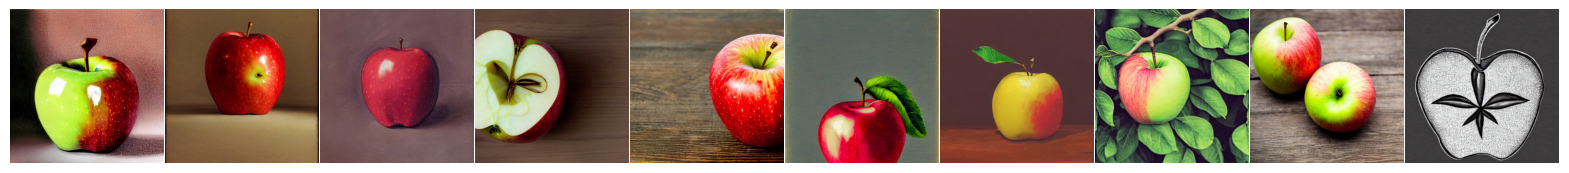

In [42]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(nrows=10, ncols=10, figure=fig, wspace=0.0001, hspace=0.0001)  

# Plot each image in the corresponding subplot
for i in range(10):
    ax = fig.add_subplot(gs[i])
    ax.imshow(org_imgs[i])
    ax.axis('off')
plt.show()

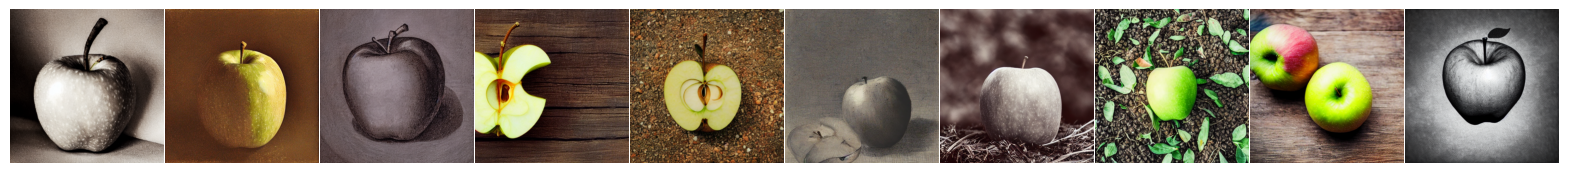

In [48]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(nrows=10, ncols=10, figure=fig, wspace=0.0001, hspace=0.0001)  

# Plot each image in the corresponding subplot
for i in range(10):
    ax = fig.add_subplot(gs[i])
    ax.imshow(abl_imgs[i])
    ax.axis('off')
plt.show()